# **Proyecto de Fintech:**


***
***

### **Predicción de Fraude en Transacciones Financieras**
- **Descripción del Proyecto:**

Desarrollar un modelo predictivo para detectar
transacciones fraudulentas en una plataforma de pagos electrónicos, utilizando
técnicas de aprendizaje automático y análisis de comportamiento.

- **Fuente de Datos:**

El conjuntos de datos de transacciones financieras
fraudulentas se obtuvo a traves de repositorios de datos abiertos como el conjunto de datos de Fraude
de Tarjetas de Crédito en Kaggle.

Link: https://www.kaggle.com/datasets/priyamchoksi/credit-card-transactions-dataset


***

## **Diccionario:**

Descripcion de las columnas del DataFrame.

1. **trans_date_trans_time:** Marca de tiempo de la transacción (fecha y hora en que ocurrió la transacción).  
2. **cc_num:** Número de la tarjeta de crédito (hash o anonimizado).  
3. **merchant:** Comerciante o tienda donde ocurrió la transacción.  
4. **category:** Tipo de transacción (ej. supermercado, entretenimiento).  
5. **amt:** Monto de la transacción.  
6. **first:** Nombre del titular de la tarjeta.  
7. **last:** Apellido del titular de la tarjeta.  
8. **gender:** Género del titular de la tarjeta.  
9. **street:** Detalles de la dirección del titular de la tarjeta.  
10. **city:** Ciudad donde reside el titular de la tarjeta.  
11. **state:** Estado donde reside el titular de la tarjeta.  
12. **zip:** Código postal del titular de la tarjeta.  
13. **lat:** Latitud de la dirección del titular de la tarjeta.  
14. **long:** Longitud de la dirección del titular de la tarjeta.  
15. **city_pop:** Población de la ciudad del titular de la tarjeta.  
16. **job:** Ocupación o profesión del titular de la tarjeta.  
17. **dob:** Fecha de nacimiento del titular de la tarjeta.  
18. **trans_num:** Identificador único de la transacción.  
19. **unix_time:** Marca de tiempo de la transacción en Unix (segundos desde la época Unix, útil para cálculos de tiempo).  
20. **merch_lat:** Latitud de la ubicación del comerciante.  
21. **merch_long:** Longitud de la ubicación del comerciante.  
22. **is_fraud:** Indicador de si la transacción fue fraudulenta (1 para fraudulenta, 0 para no fraudulenta).  
23. **merch_zipcode:** Código postal del comerciante.


***

## **Importar Librerias**:

In [4]:
# Importa las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

***

## **Carga de los Archivos**:

In [5]:
# Cargar el archivo .csv, especificando qué columnas incluir (todas menos 'Unnamed: 0') en un DataFrame
df = pd.read_csv('credit_card_transactions.csv', usecols=lambda column: column != 'Unnamed: 0')

- Al crear el Dataframe se omite usar la columna 'Unnamed: 0', debido a que es un indice que comienza desde el 1. Por este motivo se procede a no cargarlo en el Dataframe.

***

## **Display de Celdas para Visualización**:

In [6]:
# Muestra todas las columnas
pd.set_option('display.max_columns', None)

# Muestra todas las filas
pd.set_option('display.max_rows', None) 

# Limita el ancho de cada columna a 50 caracteres
pd.set_option('display.max_colwidth', None)  

# Formatear los valores para que se muestren como números en lugar de notación científica
pd.options.display.float_format = '{:,.2f}'.format

- Se modifica el seteo para poder observar la totalidad de Columnas, Filas y Ancho de las Celdas.

***

## **Visualización General del DataFrame**:

In [7]:
#Tamaño del DataFrame
df_tamaño = df.size
print(f'El DataFrame posee un total de {df_tamaño} Celdas')

El DataFrame posee un total de 29823525 Celdas


In [8]:
#Forma, Columnas y FIlas
df_forma = df.shape
print(f'El DataFrame posee un Total de:\n\n-Columnas: {df_forma[1]} \n-Filas: {df_forma[0]}')

El DataFrame posee un Total de:

-Columnas: 23 
-Filas: 1296675


In [9]:
# Características generales del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

- El DataFrame posee un total de __1296675__ registros y __23__ columnas), unicamente posee una sola columna con datos nulos, la columna'merch_zipcode'.

- Se puede observar que hay columnas que deberan modificarse para mejor su tratamiento, ``'trans_date_trans_time', 'dob', 'unix_time'`` que corresponden a datos de tiempo, se encuentran en otro formato. Igualmente con merch_zipcode que es seria de tipo int64

In [10]:
# Verifica los primeros registros
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.08,-81.18,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01,-82.05,0,"28,705.00"
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.89,-118.21,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.16,-118.19,0,NaN
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.18,-112.26,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15,-112.15,0,"83,236.00"
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.23,-112.11,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03,-112.56,0,NaN
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.42,-79.46,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67,-78.63,0,"22,844.00"


***

## **Datos Ausentes:**

In [11]:
# Suma los ausentes de cada columna
datos_faltantes = df.isna().sum()

# Calcula el total de los nulos
total_faltantes = datos_faltantes.sum()

# Porcentaje Total de los faltantes
porcentaje_faltantes = round((total_faltantes / df_tamaño) * 100, 2)

# Impresión en pantalla de los resultados
print(f'Faltantes por Columnas:\n{datos_faltantes}\n')
print('---------------------------------------')
print(f'Faltantes totales: {total_faltantes}')
print(f'Porcentaje Total de Faltantes: {porcentaje_faltantes}%')


Faltantes por Columnas:
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64

---------------------------------------
Faltantes totales: 195973
Porcentaje Total de Faltantes: 0.66%


- La única columna con valores faltantes es '__merch_zipcode__', con un total de 195,973 registros ausentes, lo que representa un 0.66% del total de los datos. Dado que este porcentaje es relativamente bajo, es importante evaluar si la ausencia de esta información afecta de manera significativa los registros clasificados como fraudulentos. Un análisis detallado sobre cómo estos valores nulos podrían influir en la detección de fraudes permitirá decidir si es necesario aplicar técnicas de imputación, eliminación de registros, o si su impacto es lo suficientemente marginal como para ser ignorado

***

## **Datos Duplicados:**

In [12]:
# Crea variable con numero de duplicados
cantidad_duplicados = df.duplicated().sum()
print(f'La cantidad de Filas Duplicadas es: {cantidad_duplicados}')

La cantidad de Filas Duplicadas es: 0


- No se encuentran duplicados de registros en todo el DataFrame.

***

## **Variables:**

- Observamos el tipo de Variables que posee el Dataframe, para decidir si es necesario realizar un cambio de tipo que facilite su tratamiento en su posterior análisis.

In [13]:
# Tipo de Dato de cada Columna
variables = df.dtypes
print(f'Tipo de dato de cada Variable:\n{variables}')

Tipo de dato de cada Variable:
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
merch_zipcode            float64
dtype: object


In [14]:
# Variable con los tipos de datos únicos
tipo_variable = set(df.dtypes)
print(f'Tipo de variables unicas:\n{tipo_variable}')

Tipo de variables unicas:
{dtype('int64'), dtype('O'), dtype('float64')}


In [15]:
# Columnas según tipo de variable 'object'
columnas_object = df.select_dtypes(include=['object']).columns
print(f'Variables tipo Object:\n{columnas_object}\n')

# Columnas según tipo de variable 'int64'
columnas_int64 = df.select_dtypes(include=['int64']).columns
print(f'Variables tipo Object:\n{columnas_int64}\n')

# Columnas según tipo de variable 'float64'
columnas_float64 = df.select_dtypes(include=['float64']).columns
print(f'Variables tipo Float:\n{columnas_float64}')

Variables tipo Object:
Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

Variables tipo Object:
Index(['cc_num', 'zip', 'city_pop', 'unix_time', 'is_fraud'], dtype='object')

Variables tipo Float:
Index(['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'merch_zipcode'], dtype='object')


### **Modificar Columnas:**

In [16]:
# Convertir la columna 'trans_date_trans_time' a formato datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Verificar el tipo de dato modificado
print(f"Tipo de dato modificado, columna 'trans_date_trans_time': {df['trans_date_trans_time'].dtype}")

# Convertir 'dob' a formato datetime 
df['dob'] = pd.to_datetime(df['dob'])

# Verificar el tipo de dato modificado
print(f"Tipo de dato modificado, columna 'dob': {df['dob'].dtype}")



Tipo de dato modificado, columna 'trans_date_trans_time': datetime64[ns]
Tipo de dato modificado, columna 'dob': datetime64[ns]


In [17]:
# Convertir 'unix_time' en formato de fecha legible
df['unix_time'] = pd.to_datetime(df['unix_time'], unit='s')

def ajustar_anio(fecha):
    """
    Ajusta el año de una fecha para corregir fechas incorrectas en los registros.

    Esta función está diseñada para corregir fechas en los años 2012 y 2013, sumando
    7 años a la fecha. Si la fecha está en un año diferente, la función la devuelve
    sin cambios. Además, si ocurre un error al intentar ajustar el año (por ejemplo,
    cuando la fecha es el 29 de febrero de un año bisiesto que no existe en el nuevo
    año), se corrige el problema sumando manualmente 7 años en días.

    Parámetros:
    ----------
    fecha : pandas.Timestamp
        La fecha original que se desea ajustar.

    Retorna:
    -------
    pandas.Timestamp
        La fecha ajustada, ya sea con el año corregido o sumando manualmente días en
        caso de errores de calendario.

    Ejemplos:
    ---------
    >>> ajustar_anio(pd.Timestamp('2012-02-29'))
    Timestamp('2019-02-28 00:00:00')

    >>> ajustar_anio(pd.Timestamp('2012-06-15'))
    Timestamp('2019-06-15 00:00:00')

    >>> ajustar_anio(pd.Timestamp('2014-06-15'))
    Timestamp('2014-06-15 00:00:00')
    
    Notas:
    ------
    La corrección se hace para fechas en los años 2012 y 2013, sumando 7 años.
    Si el ajuste directo de año provoca un error (como un 29 de febrero no válido),
    se utiliza `timedelta` para sumar 7 años equivalentes en días.
    """
    try:
        # Si el año es 2012 o 2013, ajusta el año sumando 7
        if fecha.year in [2012, 2013]:
            return fecha.replace(year=fecha.year + 7)
        else:
            return fecha
    except ValueError:
        # Si hay un error (por ejemplo, un 29 de febrero), ajustamos sumando días
        return fecha + timedelta(days=365 * 7)

# Aplicar la función de ajuste a la columna 'unix_time'
df['unix_time'] = df['unix_time'].apply(ajustar_anio)

In [18]:
# Crear una función para calcular la edad con relativedelta
def calcular_edad(fecha_nacimiento):
    """
    Calcular la edad de una persona en años a partir de su fecha de nacimiento.

    Args:
        fecha_nacimiento (datetime): La fecha de nacimiento de la persona.

    Returns:
        int: La edad de la persona en años.
    """
    
    # Obtener la fecha actual en formato datetime
    fecha_actual = pd.to_datetime('today')
    
    # Calcular la diferencia entre la fecha actual y la fecha de nacimiento
    # y retornar solo la cantidad de años.
    return relativedelta(fecha_actual, fecha_nacimiento).years


# Aplicar la función a la columna 'dob' para crear una nueva columna 'edad'
df['dob'] = df['dob'].apply(calcular_edad)

# Muestra la Columna creada
print(f"Columna dob modificada:\n{df['dob'].head(10)}")


Columna dob modificada:
0    36
1    46
2    62
3    57
4    38
5    63
6    31
7    77
8    83
9    50
Name: dob, dtype: int64


In [19]:
# Convertir la columna 'merch_zipcode' al tipo Int64
df['merch_zipcode'] = df['merch_zipcode'].astype('Int64')

# Verificar el tipo de dato de la columna después de la conversión
print(f"Tipo de Dato Modificado: {df['merch_zipcode'].dtype}")

Tipo de Dato Modificado: Int64


Debido a estas discrepancias en los tipos de datos, se procederá con las siguientes transformaciones:

- **Convertir** ``trans_date_trans_time`` y dob a tipo ````datetime````:
La conversión de estas columnas a tipo de dato ``datetime`` permitirá realizar operaciones con fechas y facilitará los análisis temporales.

- **Convertir** ``merch_zipcode`` a tipo ``int64``:
Asegurar que la columna de códigos postales sea del tipo de dato adecuado (enteros) ayudará a garantizar la integridad de los datos y permitirá el análisis geográfico basado en códigos postales.

- **Convertir** ``unix_time`` de segundos a ``datetime``:
La conversión de los valores de tiempo Unix a un formato ``datetime`` permitirá un análisis temporal más preciso y facilitará la comparación con otras fechas en el dataset.

***

## **Variables:**

- Agrupamos  las variables según su tipo para un análisis individual.

In [20]:
# Columnas según tipo de variable 'object'
columnas_cualitativa = df.select_dtypes(include=['object']).columns
print(f'Variables tipo Cualitativa:\n{columnas_cualitativa}\n')

# Columnas según tipo de variable 'int64'
columnas_cuantitativa = df.select_dtypes(include=['int64', 'float64']).columns
print(f'Variables tipo Cuantitativa:\n{columnas_cuantitativa}\n')

# Columnas según tipo de variable 'datetime64'
columnas_tiempo = df.select_dtypes(include=['datetime64']).columns
print(f'Variables tipo Tiempo:\n{columnas_tiempo}')

Variables tipo Cualitativa:
Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'trans_num'],
      dtype='object')

Variables tipo Cuantitativa:
Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'dob', 'merch_lat',
       'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

Variables tipo Tiempo:
Index(['trans_date_trans_time', 'unix_time'], dtype='object')


***

### **Cuantitativas:**

In [21]:
# Se Filtran las columnas necesarias para el análisis estadísticos
df[['amt', 'city_pop', 'dob']].describe()

,amt,city_pop,dob
count,"1,296,675.00","1,296,675.00","1,296,675.00"
mean,70.35,"88,824.44",50.53
std,160.32,"301,956.36",17.39
min,1.00,23.00,19.00
25%,9.65,743.00,37.00
50%,47.52,"2,456.00",48.00
75%,83.14,"20,328.00",62.00
max,"28,948.90","2,906,700.00",99.00


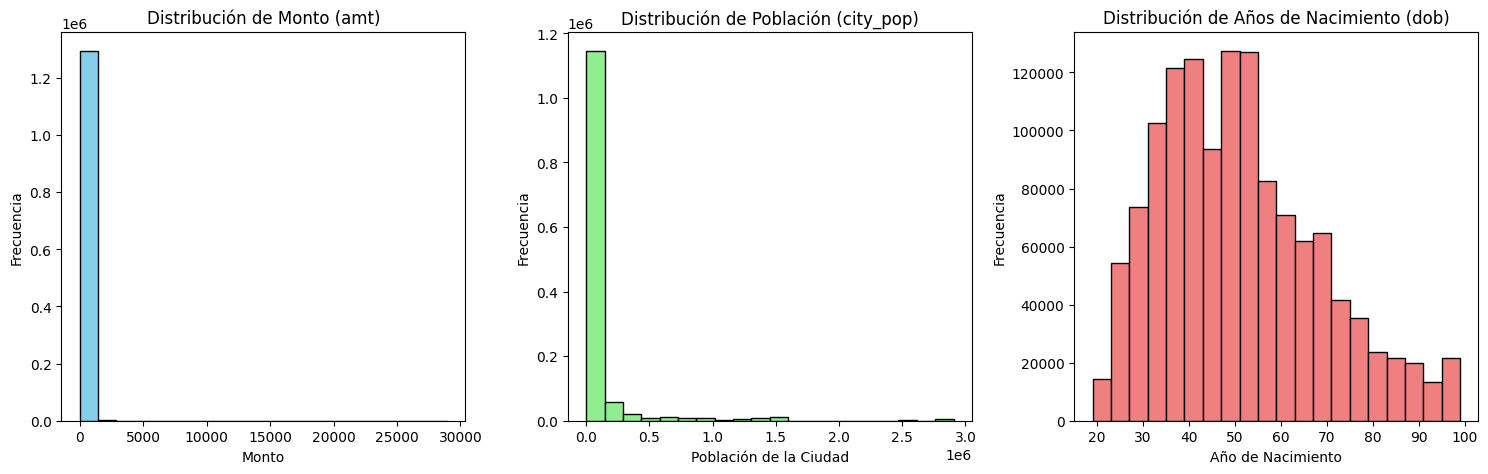

In [148]:
# Crear los histogramas
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histograma del monto de transacciones (amt)
axs[0].hist(df['amt'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Distribución de Monto (amt)')
axs[0].set_xlabel('Monto')
axs[0].set_ylabel('Frecuencia')

# Histograma de la población de las ciudades (city_pop)
axs[1].hist(df['city_pop'], bins=20, color='lightgreen', edgecolor='black')
axs[1].set_title('Distribución de Población (city_pop)')
axs[1].set_xlabel('Población de la Ciudad')
axs[1].set_ylabel('Frecuencia')

# Histograma del año de nacimiento (dob)
axs[2].hist(df['dob'], bins=20, color='lightcoral', edgecolor='black')
axs[2].set_title('Distribución de Años de Nacimiento (dob)')
axs[2].set_xlabel('Año de Nacimiento')
axs[2].set_ylabel('Frecuencia')

# Ajustar el layout
plt.tight_layout()
plt.show()

#### **Análisis Estadístico de las Variables `amt`, `city_pop` y `dob`**

#### **Monto de las Transacciones (`amt`)**
- **Total de Datos**: 1,296,675 registros.
- **Media**: El valor promedio de las transacciones es de **$70.35**, lo que sugiere que la mayoría de las transacciones tienden a ser relativamente pequeñas.
- **Desviación Estándar**: **$160.32**, lo cual indica una alta variabilidad en los montos de las transacciones. Esto sugiere la presencia de transacciones tanto muy bajas como excepcionalmente altas.
- **Rango**: 
  - **Mínimo**: $1.00
  - **Máximo**: $28,948.90
  - La diferencia significativa entre el valor mínimo y el máximo también refleja la dispersión en los montos.
- **Percentiles**:
  - El **25%** de las transacciones tiene un valor menor o igual a **$9.65**.
  - El **50%** (mediana) de las transacciones es menor o igual a **$47.52**, lo que significa que la mitad de las transacciones no supera este valor.
  - El **75%** de las transacciones tiene un valor menor o igual a **$83.14**, lo que indica que solo una cuarta parte de las transacciones superan este monto.

#### **Población de la Ciudad (`city_pop`)**
- **Total de Datos**: 1,296,675 registros.
- **Media**: La población promedio de las ciudades en este conjunto de datos es **88,824** habitantes.
- **Desviación Estándar**: **301,956**, lo que indica una gran dispersión entre las poblaciones de las ciudades. Este valor sugiere la presencia de grandes ciudades con poblaciones significativamente mayores en comparación con las ciudades más pequeñas.
- **Rango**: 
  - **Mínimo**: 23 habitantes.
  - **Máximo**: 2,906,700 habitantes, reflejando la presencia de grandes ciudades en el conjunto de datos.
- **Percentiles**:
  - El **25%** de las ciudades tiene una población menor o igual a **743** habitantes.
  - El **50%** de las ciudades tiene una población menor o igual a **2,456** habitantes.
  - El **75%** de las ciudades tiene una población menor o igual a **20,328** habitantes. Esto indica que la mayoría de las transacciones ocurren en ciudades más pequeñas, aunque el promedio está influenciado por algunas grandes ciudades.

#### **Año de Nacimiento (`dob`)**
- **Total de Datos**: 1,296,675 registros.
- **Media**: El año promedio de nacimiento es aproximadamente el año **1950** (redondeado).
- **Desviación Estándar**: **17.39 años**, lo que indica una distribución relativamente amplia en los años de nacimiento.
- **Rango**: 
  - **Mínimo**: 19 (aparentemente representando años de nacimiento más antiguos).
  - **Máximo**: 99, lo que podría indicar que los datos incluyen individuos de hasta 99 años de edad.
- **Percentiles**:
  - El **25%** de los registros corresponde a personas nacidas antes del año **1983** (37 años o más).
  - El **50%** corresponde a personas nacidas antes del año **1972** (48 años o más).
  - El **75%** corresponde a personas nacidas antes del año **1960** (62 años o más), lo que sugiere que la mayoría de las transacciones están asociadas con individuos mayores.

#### **Conclusión:**
Este análisis revela que:
- Las transacciones tienen una gran variabilidad en términos de monto.
- Las ciudades involucradas en las transacciones varían ampliamente en tamaño, pero la mayoría de las transacciones ocurren en ciudades pequeñas.
- La distribución de los años de nacimiento muestra una concentración de usuarios de entre 40 y 60 años, siendo la mayoría mayores de 48 años.


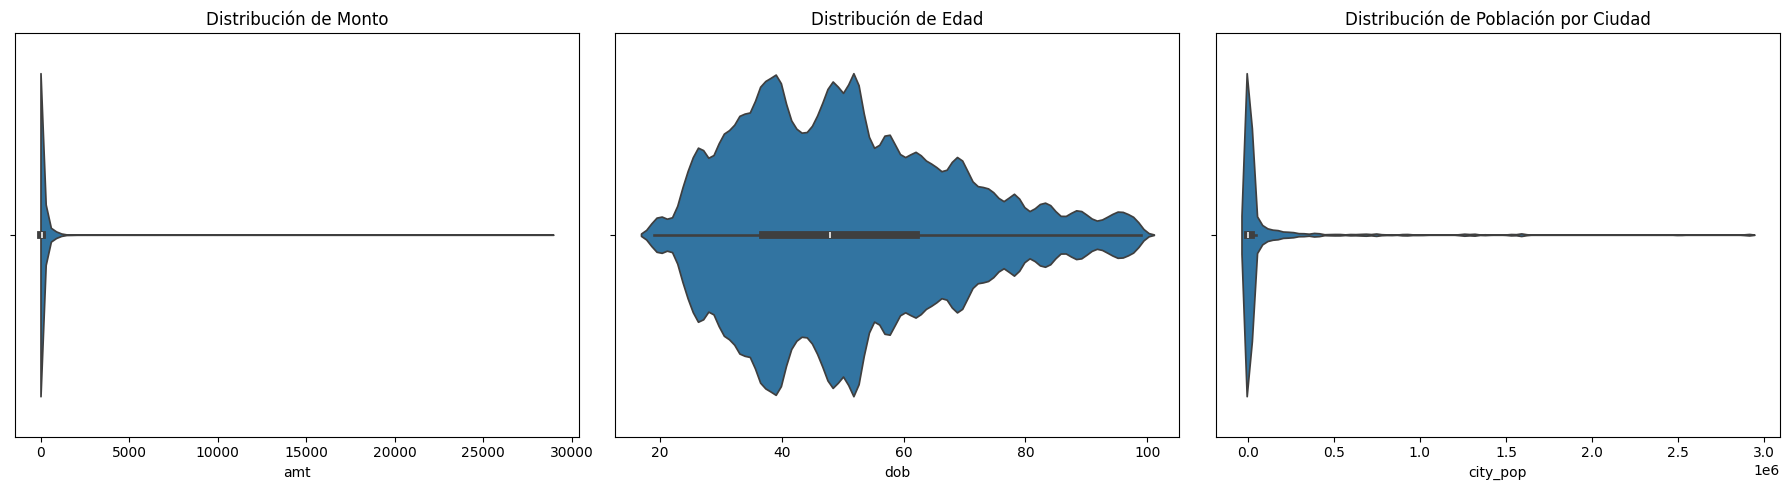

In [22]:
# Crear una figura con 1 fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Tres gráficos en una fila

# Crear los violin plots para cada columna
sns.violinplot(ax=axes[0], x=df['amt'])
axes[0].set_title('Distribución de Monto')

sns.violinplot(ax=axes[1], x=df['dob'])
axes[1].set_title('Distribución de Edad')

sns.violinplot(ax=axes[2], x=df['city_pop'])
axes[2].set_title('Distribución de Población por Ciudad')

# Ajustar el diseño
plt.tight_layout()

# Mostrar la figura con los 3 violinplots
plt.show()

In [23]:
# Iterar sobre las variables seleccionadas
for variable in ['amt', 'city_pop', 'dob']:
    # Calcular los cuartiles (Q1 y Q3)
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)

    # Calcular el rango intercuartílico (IQR)
    IQR = Q3 - Q1

    # Calcular los límites inferior y superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificar outliers
    outliers = df[(df[variable] < limite_inferior) | (df[variable] > limite_superior)]

    # Imprimir resultados
    print(f'Los cuartiles, rango y límites para la variable "{variable}" son: \nQ1: {Q1}\nQ3: {Q3}\nIQR: {IQR}\nLímite Superior: {limite_superior}\nLímite Inferior: {limite_inferior}')
    print(f"\nOutliers detectados para {variable}: {len(outliers)}")
    print(outliers[variable].head())
    print("\n" + "-"*40 + "\n")


Los cuartiles, rango y límites para la variable "amt" son: 
Q1: 9.65
Q3: 83.14
IQR: 73.49
Límite Superior: 193.375
Límite Inferior: -100.58499999999998

Outliers detectados para amt: 67290
2    220.11
9    198.39
16   327.00
17   341.67
36   207.36
Name: amt, dtype: float64

----------------------------------------

Los cuartiles, rango y límites para la variable "city_pop" son: 
Q1: 743.0
Q3: 20328.0
IQR: 19585.0
Límite Superior: 49705.5
Límite Inferior: -28634.5

Outliers detectados para city_pop: 242674
9     151785
12    341043
19    124967
22     71485
24     95015
Name: city_pop, dtype: int64

----------------------------------------

Los cuartiles, rango y límites para la variable "dob" son: 
Q1: 37.0
Q3: 62.0
IQR: 25.0
Límite Superior: 99.5
Límite Inferior: -0.5

Outliers detectados para dob: 0
Series([], Name: dob, dtype: int64)

----------------------------------------



### **Observaciones sobre las Variables:**

1. **monto**:  
   La variable **`amt`** presenta una gran dispersión en sus valores, lo que sugiere una amplia variedad en el monto de las transacciones. Sin embargo, también se observan varios **outliers**, lo que podría indicar transacciones con valores extremadamente elevados, o en su defecto, errores de entrada de datos. Estos valores atípicos deben ser revisados con más detalle para determinar si son casos válidos o errores de ingreso.

2. **Población de la Ciudad**:  
   La variable **`city_pop`** muestra un rango extremadamente amplio, con algunos valores que son significativamente grandes. Esto sugiere la posibilidad de **errores de registro** o **registros excepcionales** relacionados con ciertas ubicaciones geográficas. Es recomendable investigar la fuente de estos valores para asegurarse de que la información sea precisa y confiable.

3. **Edad**:  
   A diferencia de las otras variables, la **`dob`** no presenta **outliers**, lo que indica que los datos relacionados con la edad son **relativamente homogéneos** y están dentro del rango esperado. Esto sugiere que no hay errores significativos en la recopilación de datos de edad, y los valores parecen ser consistentes y confiables.




***

### **Cualitativas:**

### **1- is_fraud:**

- La Variable 'es_fraude' es del tipo booleano, cuando es igual a 0, no es Fraude, si es igual a 1, es igual a Fraude.

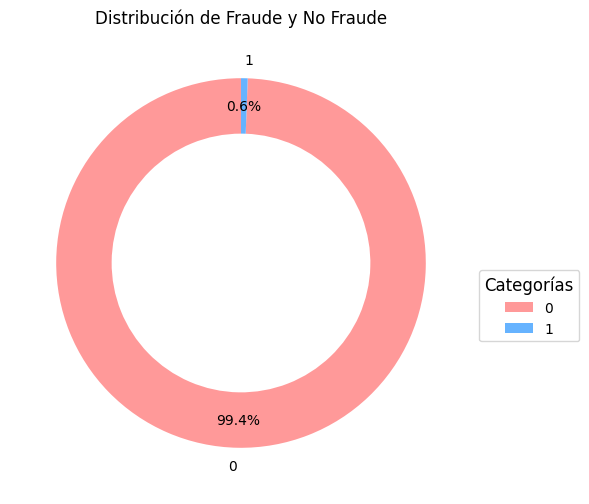

Total de Operaciones: 1296675
   Fraude   Conteo
0       0  1289169
1       1     7506


In [24]:
# Obtener los conteos de fraude y no fraude
df_fraude_conteo = df['is_fraud'].value_counts()
df_fraude_no_fraude = df_fraude_conteo.reset_index()
df_fraude_no_fraude.columns = ['Fraude', 'Conteo']

# Datos para el gráfico de torta
labels = df_fraude_no_fraude['Fraude']
sizes = df_fraude_no_fraude['Conteo']
colors = ['#ff9999', '#66b3ff']  # Personaliza los colores según lo que prefieras

# Crear gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops={'width': 0.3})
# Configurar el aspecto del gráfico para que sea un círculo
plt.gca().set_aspect('equal')

# Agregar leyenda
plt.legend(labels=labels, loc="best", fontsize='medium', title="Categorías", title_fontsize='large', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.title('Distribución de Fraude y No Fraude')
plt.show()
print(f'Total de Operaciones: {len(df)}\n{df_fraude_no_fraude}')

### **2- Ciudad:**

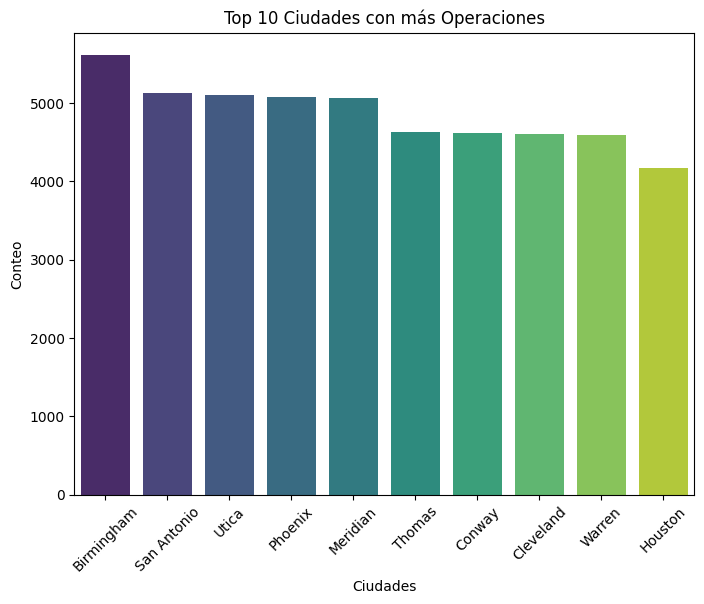

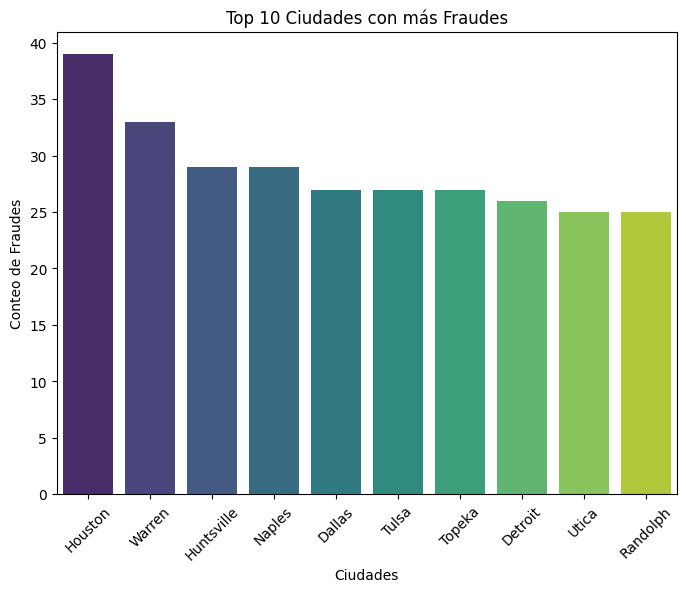

Cantidad de Ciudades: 894
      ciudades  conteo
0   Birmingham    5617
1  San Antonio    5130
2        Utica    5105
3      Phoenix    5075
4     Meridian    5060
5       Thomas    4634
6       Conway    4613
7    Cleveland    4604
8       Warren    4599
9      Houston    4168
Cantidad de Ciudades con Fraude: 702
     ciudades  conteo
0     Houston      39
1      Warren      33
2  Huntsville      29
3      Naples      29
4      Dallas      27
5       Tulsa      27
6      Topeka      27
7     Detroit      26
8       Utica      25
9    Randolph      25


In [25]:
# Obtener los 10 estados con mayor número de ocurrencias
primeros_10_ciudades = df['city'].value_counts().head(10)

# Reiniciar el índice para que los nombres de las ciudades estén en una columna y sus conteos en otra
primeros_10_ciudades = primeros_10_ciudades.reset_index()

# Renombrar las columnas: 'index' (que contenía las ciudades) ahora será 'ciudades',
# y la columna con los conteos será 'conteo'
primeros_10_ciudades.columns = ['ciudades', 'conteo']

# Tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear gráfico de barras por ciudad
sns.barplot(x='ciudades', y='conteo', data=primeros_10_ciudades, palette='viridis', hue='ciudades', dodge=False)

# Añadir título y etiquetas
plt.title('Top 10 Ciudades con más Operaciones')
plt.xlabel('Ciudades')
plt.ylabel('Conteo')

# Rotar las etiquetas del eje X para evitar superposición
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

# Filtrar las transacciones con fraude
df_fraude = df[df['is_fraud'] == 1]

# Obtener las ciudades con más transacciones fraudulentas
primeros_10_ciudades_fraude = df_fraude['city'].value_counts().head(10)

# Reiniciar el índice para que los nombres de las ciudades estén en una columna y sus conteos en otra
primeros_10_ciudades_fraude = primeros_10_ciudades_fraude.reset_index()

# Renombrar las columnas: 'index' (que contenía las ciudades) ahora será 'ciudades',
# y la columna con los conteos será 'conteo'
primeros_10_ciudades_fraude.columns = ['ciudades', 'conteo']

# Tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear gráfico de barras por ciudad (fraude)
sns.barplot(x='ciudades', y='conteo', data=primeros_10_ciudades_fraude, palette='viridis', hue='ciudades', dodge=False)

# Añadir título y etiquetas
plt.title('Top 10 Ciudades con más Fraudes')
plt.xlabel('Ciudades')
plt.ylabel('Conteo de Fraudes')

# Rotar las etiquetas del eje X para evitar superposición
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

# Imprimir la cantidad de ciudades únicas y los datos de las 10 ciudades con más fraude
print(f"Cantidad de Ciudades: {df['city'].nunique()}")
print(f'{primeros_10_ciudades}')
print(f"Cantidad de Ciudades con Fraude: {df_fraude['city'].nunique()}")
print(f'{primeros_10_ciudades_fraude}')


#### **Observaciones:**
1. **Alta concentración en ciudades con mayor fraude**:  
   Las ciudades con más registros de fraude tienden a estar en el mismo rango que las que tienen un mayor número de transacciones. **Houston** es la ciudad con más fraudes, con **39 registros de fraude**, lo que la convierte en una zona crítica a analizar. Otras ciudades destacadas son **Warren** y **Huntsville**, con un número notable de transacciones fraudulentas.

2. **Frecuencia de fraude por ciudad**:  
   Un número elevado de ciudades presenta fraude, lo que sugiere que el fraude no está concentrado solo en unas pocas ubicaciones, sino que es un problema extendido. Sin embargo, el hecho de que algunas ciudades como **Houston** y **Warren** lideren las estadísticas, sugiere que en estos lugares el fraude podría estar más relacionado con ciertos factores específicos (como actividad económica o sector comercial).

3. **Potenciales áreas de intervención**:  
   Las ciudades con altos niveles de fraude, como **Houston, Warren, y Huntsville**, deben ser consideradas como áreas prioritarias para una investigación más detallada. Se podrían aplicar técnicas de análisis adicionales, como la detección de patrones de fraude, para entender mejor la naturaleza del problema en estas ubicaciones.

4. **Proporción de ciudades sin fraude**:  
   De las **894 ciudades**, solo **702** presentan fraude. Esto indica que una gran parte de las ciudades (alrededor del 21%) no tienen registros de fraude en este conjunto de datos, lo que podría ofrecer insights sobre diferencias en prácticas de seguridad, políticas comerciales o características geográficas.


### **3- Estados:**

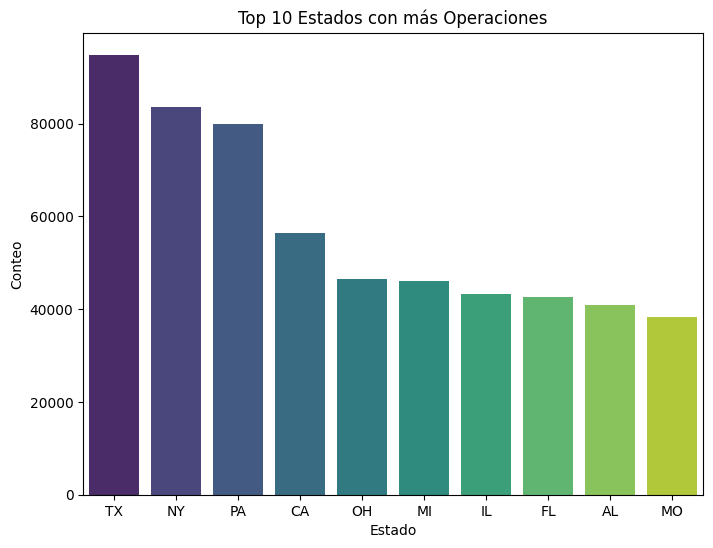

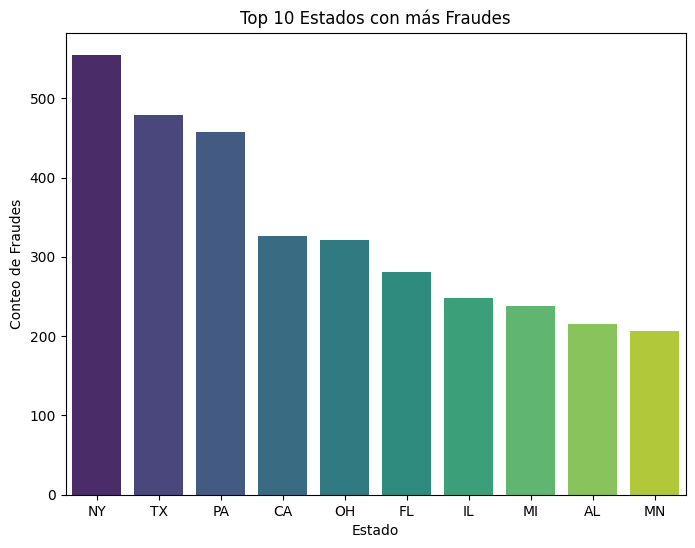

Cantidad de Estados: 51
  estados  conteo
0      TX   94876
1      NY   83501
2      PA   79847
3      CA   56360
4      OH   46480
5      MI   46154
6      IL   43252
7      FL   42671
8      AL   40989
9      MO   38403
Cantidad de Estados con Fraude: 51
  estados  conteo
0      NY     555
1      TX     479
2      PA     458
3      CA     326
4      OH     321
5      FL     281
6      IL     248
7      MI     238
8      AL     215
9      MN     207


In [26]:
# Obtener los 10 estados con mayor número de ocurrencias
primeros_10_estados = df['state'].value_counts().head(10)

# Reiniciar el índice para que los nombres de los estados estén en una columna y sus conteos en otra
primeros_10_estados = primeros_10_estados.reset_index()

# Renombrar las columnas: 'index' (que contenía los estados) ahora será 'estados',
# y la columna con los conteos será 'conteo'
primeros_10_estados.columns = ['estados', 'conteo']

# Tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear gráfico de barras por estado
sns.barplot(x='estados', y='conteo', data=primeros_10_estados, palette='viridis', hue='estados', dodge=False)

# Añadir título y etiquetas
plt.title('Top 10 Estados con más Operaciones')
plt.xlabel('Estado')
plt.ylabel('Conteo')

# Mostrar el gráfico
plt.show()

# Filtrar las transacciones con fraude
df_fraude = df[df['is_fraud'] == 1]

# Obtener los estados con más transacciones fraudulentas
primeros_10_estados_fraude = df_fraude['state'].value_counts().head(10)

# Reiniciar el índice para que los nombres de los estados estén en una columna y sus conteos en otra
primeros_10_estados_fraude = primeros_10_estados_fraude.reset_index()

# Renombrar las columnas: 'index' (que contenía los estados) ahora será 'estados',
# y la columna con los conteos será 'conteo'
primeros_10_estados_fraude.columns = ['estados', 'conteo']

# Tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear gráfico de barras por estado (fraude)
sns.barplot(x='estados', y='conteo', data=primeros_10_estados_fraude, palette='viridis', hue='estados', dodge=False)

# Añadir título y etiquetas
plt.title('Top 10 Estados con más Fraudes')
plt.xlabel('Estado')
plt.ylabel('Conteo de Fraudes')

# Mostrar el gráfico
plt.show()

# Imprimir la cantidad de estados únicos y los datos de los 10 estados con más operaciones
print(f"Cantidad de Estados: {df['state'].nunique()}")
print(f'{primeros_10_estados}')

# Imprimir la cantidad de estados únicos con fraude y los datos de los 10 estados con más fraudes
print(f"Cantidad de Estados con Fraude: {df_fraude['state'].nunique()}")
print(f'{primeros_10_estados_fraude}')


#### **Observaciones:**

1. **Top 10 Estados con Más Operaciones**
En el análisis de las operaciones transaccionales, se destacan los siguientes estados como los de mayor actividad:

- **Houston**: Encabeza la lista con un número significativo de operaciones, indicando que es uno de los centros más activos en cuanto a transacciones.
- **Warren, Huntsville, y Naples**: Estos estados también presentan altos volúmenes de transacciones, lo que sugiere que hay una alta concentración de actividades comerciales en estas áreas.
- **Dallas y Tulsa**: Con una cantidad de operaciones notable, estos estados podrían ser importantes en términos de comercio y actividades financieras.



2. **Top 10 Estados con Más Fraudes**
El análisis de los fraudes revela los estados con mayores incidencias en términos de transacciones fraudulentas:

- **Houston**: Aunque lidera en transacciones, también es el estado con la mayor cantidad de fraudes, lo que podría indicar un riesgo elevado en las operaciones de este estado.
- **Warren y Huntsville**: Junto con Houston, son las ubicaciones con los mayores incidentes de fraude.
- **Naples y Dallas**: También presentan una mayor frecuencia de fraudes, sugiriendo que estas áreas podrían estar bajo vigilancia o riesgo en términos de actividades fraudulentas.


---
**Conclusiones**
- **Houston** es el estado con la mayor actividad tanto en operaciones como en fraudes, lo que podría indicar la necesidad de implementar controles más estrictos en las transacciones en esta región.
- Es recomendable realizar un análisis más detallado en **Warren**, **Huntsville**, **Naples**, y **Dallas** para entender mejor los patrones de fraude y posibles áreas de riesgo.
- La diferencia entre los estados con más transacciones y los estados con más fraudes sugiere que el volumen transaccional no siempre correlaciona directamente con el riesgo de fraude. Esto puede ser importante al diseñar estrategias para mitigar fraudes en áreas de alto volumen transaccional.
- Al comparar ambos gráficos, se observa que los estados con mayor número de operaciones no siempre coinciden con los estados con mayor número de fraudes. Sin embargo, estados como **Houston**, **Warren**, y **Huntsville** aparecen en ambos listados, lo que sugiere que estos estados no solo tienen una alta actividad transaccional, sino también un mayor riesgo de fraude.
---


### **4- Categoria de Comercios:**

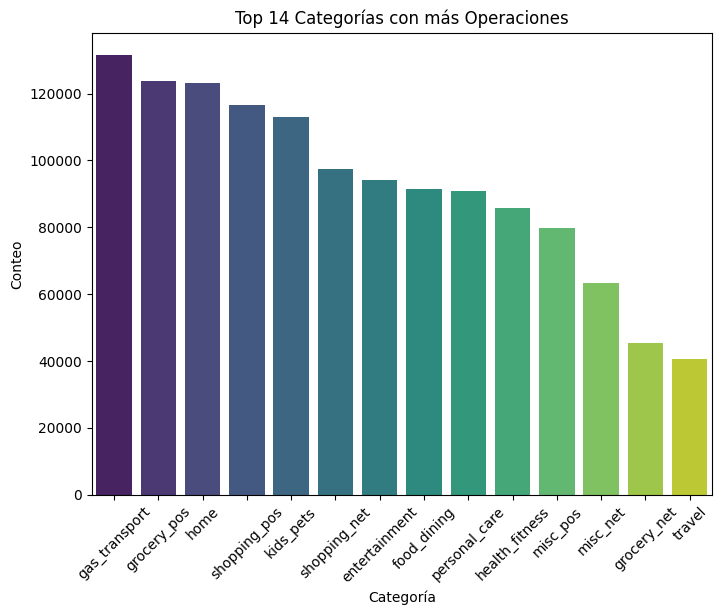

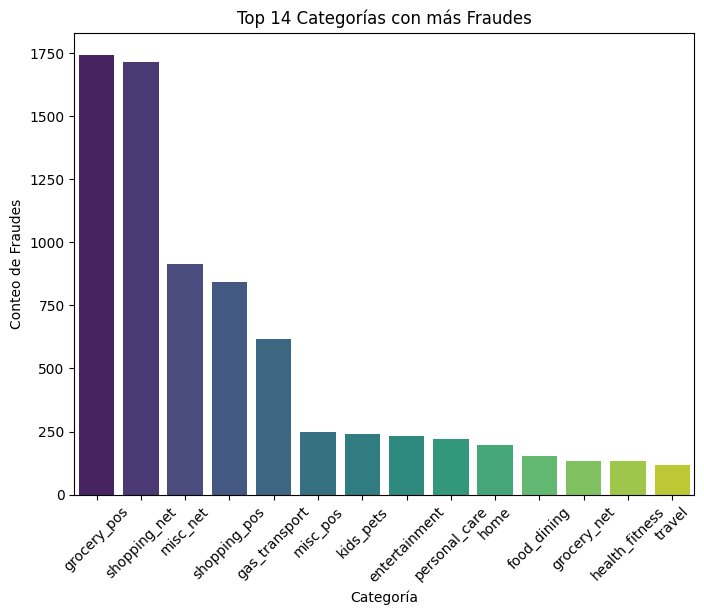

Cantidad de Categorías: 14
        categorias  conteo
0    gas_transport  131659
1      grocery_pos  123638
2             home  123115
3     shopping_pos  116672
4        kids_pets  113035
5     shopping_net   97543
6    entertainment   94014
7      food_dining   91461
8    personal_care   90758
9   health_fitness   85879
10        misc_pos   79655
11        misc_net   63287
12     grocery_net   45452
13          travel   40507
Cantidad de Categorías con Fraude: 14
        categorias  conteo
0      grocery_pos    1743
1     shopping_net    1713
2         misc_net     915
3     shopping_pos     843
4    gas_transport     618
5         misc_pos     250
6        kids_pets     239
7    entertainment     233
8    personal_care     220
9             home     198
10     food_dining     151
11     grocery_net     134
12  health_fitness     133
13          travel     116


In [27]:
# Obtener las 14 categorías con mayor número de ocurrencias
primeros_10_categorias = df['category'].value_counts().head(14)

# Reiniciar el índice para que los nombres de las categorías estén en una columna y sus conteos en otra
primeros_10_categorias = primeros_10_categorias.reset_index()

# Renombrar las columnas: 'index' (que contenía las categorías) ahora será 'categorias',
# y la columna con los conteos será 'conteo'
primeros_10_categorias.columns = ['categorias', 'conteo']

# Tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear gráfico de barras por categoría
sns.barplot(x='categorias', y='conteo', data=primeros_10_categorias, palette='viridis', hue='categorias', dodge=False)

# Añadir título y etiquetas
plt.title('Top 14 Categorías con más Operaciones')
plt.xlabel('Categoría')
plt.ylabel('Conteo')

# Rotar las etiquetas del eje X para evitar superposición
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

# Filtrar las transacciones con fraude
df_fraude = df[df['is_fraud'] == 1]

# Obtener las categorías con más transacciones fraudulentas
primeros_10_categorias_fraude = df_fraude['category'].value_counts().head(14)

# Reiniciar el índice para que los nombres de las categorías estén en una columna y sus conteos en otra
primeros_10_categorias_fraude = primeros_10_categorias_fraude.reset_index()

# Renombrar las columnas: 'index' (que contenía las categorías) ahora será 'categorias',
# y la columna con los conteos será 'conteo'
primeros_10_categorias_fraude.columns = ['categorias', 'conteo']

# Tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear gráfico de barras por categoría (fraude)
sns.barplot(x='categorias', y='conteo', data=primeros_10_categorias_fraude, palette='viridis', hue='categorias', dodge=False)

# Añadir título y etiquetas
plt.title('Top 14 Categorías con más Fraudes')
plt.xlabel('Categoría')
plt.ylabel('Conteo de Fraudes')

# Rotar las etiquetas del eje X para evitar superposición
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

# Imprimir la cantidad de categorías únicas y los datos de las 14 categorías con más operaciones
print(f"Cantidad de Categorías: {df['category'].nunique()}")
print(f'{primeros_10_categorias}')

# Imprimir la cantidad de categorías únicas con fraude y los datos de las 14 categorías con más fraudes
print(f"Cantidad de Categorías con Fraude: {df_fraude['category'].nunique()}")
print(f'{primeros_10_categorias_fraude}')


#### **Observaciones de Categorías de Transacciones y Fraudes:**

 1. **Top Categorías con Más Transacciones**
Las 14 categorías con mayor número de transacciones son las siguientes:

- **Gas_transport**: Con 131,659 transacciones, esta es la categoría con mayor volumen de operaciones. Esto sugiere que los gastos en transporte de gas son muy comunes entre los usuarios.
- **Grocery_pos** y **Home**: Estas categorías también presentan altos volúmenes con 123,638 y 123,115 transacciones respectivamente, lo que refleja una alta actividad en compras de comestibles y productos del hogar.
- **Shopping_pos** y **Kids_pets**: Estas categorías también están entre las más frecuentes, con 116,672 y 113,035 transacciones respectivamente, lo que indica una considerable actividad en compras y productos para niños y mascotas.
- **Shopping_net** y **Entertainment**: Ambas categorías con 97,543 y 94,014 transacciones, muestran un gran volumen de compras en línea y entretenimiento.

 2. **Top Categorías con Más Fraudes**
Las categorías más afectadas por fraudes son las siguientes:

- **Grocery_pos**: Con 1,743 casos de fraude, es la categoría con mayor número de fraudes. Esto sugiere que, a pesar de su alta frecuencia en transacciones legítimas, las compras en esta categoría podrían estar siendo objeto de una cantidad considerable de fraudes.
- **Shopping_net**: Con 1,713 fraudes, esta categoría también destaca como un área de riesgo elevado en términos de actividades fraudulentas en transacciones en línea.
- **Misc_net**: Con 915 fraudes, las transacciones en esta categoría, que probablemente incluyen diversos tipos de servicios en línea, también son susceptibles a fraudes.
- **Shopping_pos**: Con 843 fraudes, es otra categoría con un volumen significativo de fraudes, lo que indica que las compras en puntos de venta pueden ser un foco de actividades fraudulentas.
- **Gas_transport**: A pesar de ser la categoría con más transacciones, también presenta 618 casos de fraude, lo que sugiere que el transporte de gas podría tener ciertas vulnerabilidades.


---
**Conclusiones**
- Las categorías con mayor número de transacciones, como **Gas_transport**, **Grocery_pos**, y **Home**, son claves en la vida diaria de los usuarios. Sin embargo, la alta incidencia de fraudes en **Grocery_pos** y **Shopping_net** requiere una atención particular.
- Las categorías más frecuentes como **Gas_transport** y **Grocery_pos** reflejan transacciones cotidianas y necesarias, como el transporte y la compra de alimentos. Esto podría indicar que son áreas clave en la vida financiera de los usuarios.
- Las categorías como **Shopping_pos** y **Entertainment** demuestran que también existe una alta actividad en el comercio de bienes de consumo y ocio.
- Las categorías que combinan un alto volumen de transacciones con un número elevado de fraudes, como **Grocery_pos** y **Shopping_net**, deben ser priorizadas para implementar medidas de prevención y control de fraudes.
- La presencia de **Misc_net** y **Shopping_pos** en la lista de fraudes indica que las transacciones en línea, tanto en servicios diversos como en puntos de venta, son particularmente susceptibles a fraudes.
- **Grocery_pos** y **Shopping_net** lideran tanto en términos de volumen de transacciones como en incidencias de fraude. Esto sugiere que las categorías de productos de consumo diario y compras en línea son especialmente vulnerables a fraudes.
- Aunque **Gas_transport** es una categoría con un alto volumen de transacciones, el hecho de que también aparezca en la lista de categorías con fraude podría indicar que, a pesar de su prevalencia, las medidas de seguridad podrían necesitar revisión.
- Las medidas de prevención de fraude podrían beneficiarse de un enfoque en las transacciones en línea, dado que **Shopping_net** y **Misc_net** están entre las categorías más susceptibles a actividades fraudulentas.
---


***
***

## **Analisis sobre Operaciones Fraudulentas:**

- Distribución fraudes por lugar

.que lugar es el de mayor fraude(estado)

.fechas con mas fraude por fecha

- Distribución fraudes por edad

cual es la edad con mayor fraude

rango etario con mas fraude

genero por edad con mas fraude


- Distribución  por tipo de tienda

tienda con mas operaciones



In [28]:
# Crea un DataFrame con unicamente registros de Fraudes
df_fraude = df[df['is_fraud'] == 1]

# Se reinicia el indice para no generar inconvenientes
df_fraude.reset_index(drop=True, inplace=True)

# Muestra los 5 primeros registros
df_fraude.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.99,-81.73,885,Soil scientist,36,e8a81877ae9a0a7f883e15cb39dc4022,2019-01-02 01:06:37,36.43,-81.18,1,28644
1,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.44,-98.46,1595797,Horticultural consultant,63,bc7d41c41103877b03232f03f1f8d3f5,2019-01-02 01:47:29,29.82,-99.14,1,78055
2,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.44,-98.46,1595797,Horticultural consultant,63,b98f12f4168391b2203238813df5aa8c,2019-01-02 03:05:23,29.27,-98.84,1,78039
3,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.99,-81.73,885,Soil scientist,36,397894a5c4c02e3c61c784001f0f14e4,2019-01-02 03:38:03,35.91,-82.09,1,28777
4,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.44,-98.46,1595797,Horticultural consultant,63,7863235a750d73a244c07f1fb7f0185a,2019-01-02 03:55:47,29.79,-98.68,1,78006


In [30]:
# Función para generar una columna con rango etario
def rango_etario(dob):
    """
    Determina el rango etario de una persona basado en su edad.

    Args:
        edad (int): La edad de la persona.

    Returns:
        str: Una cadena que describe el rango etario de la persona.
              Los posibles valores son:
              - 'Menores a 25 Años'
              - 'Entre 25 y 40 Años'
              - 'Entre 40 y 55 Años'
              - 'Entre 55 y 70 Años'
              - 'Mayores a 70 Años'

    Raises:
        ValueError: Si la edad es negativa o no es un número entero.
    """
    
    # Valida que la edad es un número entero no negativo
    if not isinstance(dob, int) or dob < 0:
        raise ValueError("La edad debe ser un número entero no negativo.")
    
    # Define una lista de tuplas que contiene los rangos de edad y sus etiquetas correspondientes.
    rangos = [
        (0, 25, 'Menores a 25 Años'),       # Rango: 0 a 25 años
        (25, 40, 'Entre 25 y 40 Años'),     # Rango: 25 a 40 años
        (40, 55, 'Entre 40 y 55 Años'),     # Rango: 40 a 55 años
        (55, 70, 'Entre 55 y 70 Años'),     # Rango: 55 a 70 años
        (70, float('inf'), 'Mayores a 70 Años')  # Rango: 70 años en adelante (sin límite superior)
    ]
    
    # Itera sobre cada rango en la lista de rangos.
    for limite_inferior, limite_superior, etiqueta in rangos:
        # Verifica si la edad está dentro del rango actual.
        if limite_inferior <= dob < limite_superior:
            # Si la edad está dentro del rango, devuelve la etiqueta correspondiente.
            return etiqueta
        

# Crea una nueva columna aplicando la función a la variable 'edad'
df_fraude.loc[:, 'age_range'] = df_fraude['dob'].apply(rango_etario)

# Visualizar las columnas 'dob' y 'age_range'
print(f"Visualización de Columnas: \n{df_fraude[['dob', 'age_range']].head(5)}")


Visualización de Columnas: 
   dob           age_range
0   36  Entre 25 y 40 Años
1   63  Entre 55 y 70 Años
2   63  Entre 55 y 70 Años
3   36  Entre 25 y 40 Años
4   63  Entre 55 y 70 Años


In [30]:
df_fraude.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'merch_zipcode', 'age_range'],
      dtype='object')

In [31]:
# Calcula la fecha minima
fecha_minima = df['trans_date_trans_time'].min()

# Calcula la fecha Maxima
fecha_maxima = df['trans_date_trans_time'].max()

# Calcula cantidad de días entre los fechas max y min
periodo_transacciones = abs(fecha_minima - fecha_maxima)

# Calcula el tiempo aproximado en días
periodo_transacciones_año = periodo_transacciones.days / 365

# Imprime por pantalla los resultados
print(f'La fecha minima es: {fecha_minima}')
print(f'La fecha maxima es: {fecha_maxima}')
print(f'Cantidad de dias: {periodo_transacciones}')
print(f'El periodo de transacciones analizadas es aproximado: {round(periodo_transacciones_año, 2)} años')

La fecha minima es: 2019-01-01 00:00:18
La fecha maxima es: 2020-06-21 12:13:37
Cantidad de dias: 537 days 12:13:19
El periodo de transacciones analizadas es aproximado: 1.47 años


In [42]:
# Se agrupa las fechas en trimestres para el análisis.
df_fraude.loc[:, 'trimester'] = df_fraude['trans_date_trans_time'].dt.quarter
print(f"Cantidad de registros por Trimestres:\n{df_fraude['trimester'].value_counts()}")

Cantidad de registros por Trimestres:
trimester
1    2640
2    2301
4    1434
3    1131
Name: count, dtype: int64


### **Fraude por ubicacion:**

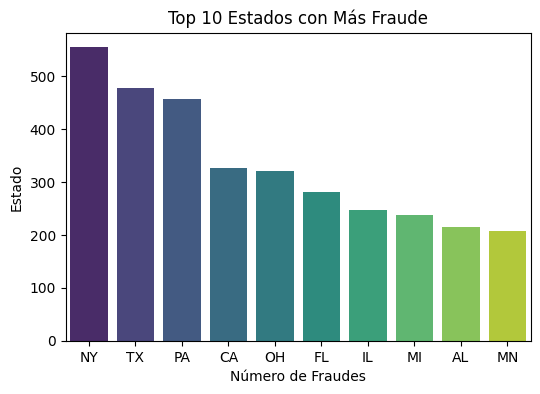

Los 10 Estados con mayor numero de Fraudes:
  state  count
0    NY    555
1    TX    479
2    PA    458
3    CA    326
4    OH    321
5    FL    281
6    IL    248
7    MI    238
8    AL    215
9    MN    207


In [85]:
# Contar el número de fraudes por estado
fraude_por_estado = df_fraude['state'].value_counts().reset_index()
fraude_por_estado.columns = ['state', 'count']

# Graficar los 10 estados con más fraudes
plt.figure(figsize=(6, 4))
# Crear gráfico de barras por estado (fraude)
sns.barplot(x='state', y='count', data=fraude_por_estado.head(10), palette='viridis', hue='state', dodge=False)
plt.title('Top 10 Estados con Más Fraude')
plt.xlabel('Número de Fraudes')
plt.ylabel('Estado')
plt.show()

print(f'Los 10 Estados con mayor numero de Fraudes:\n{fraude_por_estado.head(10)}')

C:\Users\Blasferp\AppData\Local\Temp\ipykernel_9052\623237616.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='count', data=fraude_estado_info.head(10), palette='viridis')


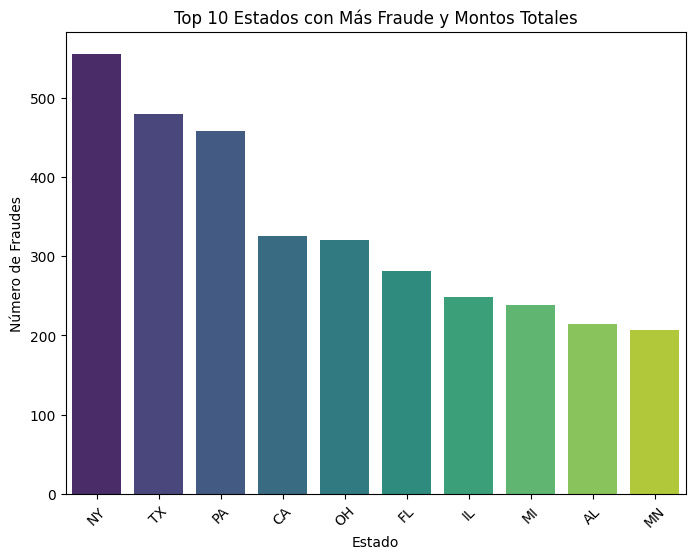

Los 10 Estados con mayor número de Fraudes y sus montos:
  state  count        amt
0    NY    555 295,548.64
1    TX    479 265,806.41
2    PA    458 244,624.67
3    CA    326 170,943.92
4    OH    321 168,919.98
5    FL    281 150,913.03
6    IL    248 128,441.99
7    MI    238 121,012.08
8    AL    215 112,596.99
9    MN    207 112,454.39


In [101]:
#  Contar el número de fraudes por estado
fraude_por_estado = df_fraude['state'].value_counts().reset_index()
fraude_por_estado.columns = ['state', 'count']

# Calcular los montos totales de fraudes por estado
fraude_por_estado_monto = df_fraude.groupby('state')['amt'].sum().reset_index()

# Combinar las dos informaciones en un solo DataFrame
fraude_estado_info = pd.merge(fraude_por_estado, fraude_por_estado_monto, on='state')

# Graficar los 10 estados con más fraudes (con montos)
plt.figure(figsize=(8, 6))

# Crear gráfico de barras para los estados con más fraudes, usando los montos totales de fraude
sns.barplot(x='state', y='count', data=fraude_estado_info.head(10), palette='viridis')

# Personalizar la gráfica
plt.title('Top 10 Estados con Más Fraude y Montos Totales')
plt.xlabel('Estado')
plt.ylabel('Número de Fraudes')
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

# Imprimir los 10 estados con mayor número de fraudes y sus montos totales
print(f'Los 10 Estados con mayor número de Fraudes y sus montos:\n{fraude_estado_info.head(10)}')


<Figure size 1000x600 with 0 Axes>

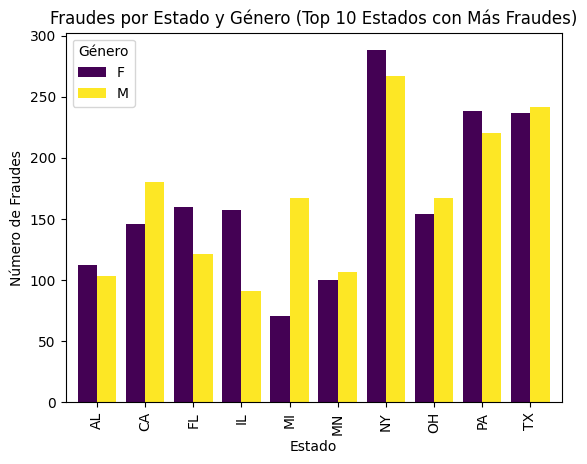

Total Fraudes por Genero "F": 1663
Total Fraudes por Genero "M": 1665
Los 10 Estados con mayor número de Fraudes:
gender state    F    M
0         AL  112  103
1         CA  146  180
2         FL  160  121
3         IL  157   91
4         MI   71  167
5         MN  100  107
6         NY  288  267
7         OH  154  167
8         PA  238  220
9         TX  237  242


In [115]:
# Contar el número de fraudes por estado
fraude_por_estado = df_fraude['state'].value_counts().reset_index()
fraude_por_estado.columns = ['state', 'count']

# Seleccionar los 10 estados con más fraudes e porcentaje 
top_10_estados = fraude_por_estado.head(10)['state']

# Filtrar df_fraude para solo incluir los 10 estados con más fraudes
df_fraude_top_10 = df_fraude[df_fraude['state'].isin(top_10_estados)]

# Contar fraudes por estado y género (para los 10 estados con más fraudes)
fraude_por_estado_genero = df_fraude_top_10.groupby(['state', 'gender']).size().unstack(fill_value=0).reset_index()

# Graficar las barras agrupadas por género y estado (solo para los 10 estados con más fraudes)
plt.figure(figsize=(10, 6))

# Crear barras agrupadas por género
fraude_por_estado_genero.set_index('state').plot(kind='bar', colormap='viridis', width=0.8)

# Personalizar la gráfica
plt.title('Fraudes por Estado y Género (Top 10 Estados con Más Fraudes)')
plt.xlabel('Estado')
plt.ylabel('Número de Fraudes')
plt.legend(title='Género')

# Mostrar la gráfica
plt.show()

# Imprimir los resultados de los 10 estados con mayor número de fraudes
print(f'Total Fraudes por Genero "F": {fraude_por_estado_genero["F"].sum()}')
print(f'Total Fraudes por Genero "M": {fraude_por_estado_genero["M"].sum()}')
print(f'Los 10 Estados con mayor número de Fraudes:\n{fraude_por_estado_genero}')



### **Observaciones:**

**Distribución de Fraudes por Género**:
   - En todos los estados con los mayores números de fraudes, los hombres tienden a tener una participación ligeramente mayor en comparación con las mujeres. En términos generales, **la cantidad de fraudes masculinos es mayor que la de las mujeres** en casi todos los estados.
   - Ejemplos:
     - En **CA** (California), hay **180 fraudes de hombres** frente a **146 fraudes de mujeres**.
     - En **TX** (Texas), los fraudes masculinos (**242**) superan a los fraudes femeninos (**237**), lo que indica una ligera mayoría de hombres en las actividades fraudulentas.
   - Sin embargo, en algunos estados la diferencia no es tan grande. Por ejemplo, en **AL** (Alabama), la diferencia es mínima, con **112 fraudes femeninos** y **103 fraudes masculinos**.

 **Estados con los Mayor Número de Fraudes**:
   - **NY (New York)** es el estado con el mayor número de fraudes, con un total de **555 fraudes**, de los cuales **288 son de mujeres** y **267 de hombres**.
   - **TX (Texas)** sigue en segundo lugar con **479 fraudes**, distribuidos entre **237 mujeres** y **242 hombres**.
   - **PA (Pennsylvania)**, con **458 fraudes**, tiene una distribución más equilibrada entre géneros, con **238 fraudes femeninos** y **220 fraudes masculinos**.

. **Monto Total de Fraudes por Estado**:
   - La cantidad de fraudes no siempre está directamente relacionada con los montos totales de fraude. Los estados con más fraudes no siempre tienen los montos más altos.
   - Sin embargo, los estados con más fraudes tienden a estar en la parte superior en cuanto a montos. Esto podría indicar que la frecuencia de fraudes en estos estados es considerablemente alta, lo que podría ser un área clave de enfoque para las estrategias de prevención de fraude.

### **Conclusiones:**

**Predomina el Fraude Masculino**:
   - En general, el fraude parece ser más común entre los hombres en la mayoría de los estados. Esto se observa claramente en estados como **CA**, **TX**, y **MI**, donde los hombres tienen una mayor participación en las actividades fraudulentas.
   
**Estados con Mayor Frecuencia de Fraudes**:
   - Los estados con el mayor número de fraudes incluyen **NY**, **TX**, y **PA**. Estos estados también presentan un volumen considerable de fraudes por género, lo que indica que podrían ser focos clave de atención para la prevención de fraudes.
   
**Diferencia Menor en Alabama**:
   - En **AL**, la diferencia entre fraudes masculinos y femeninos es muy pequeña. Esto sugiere que, en este estado en particular, las estrategias de prevención de fraudes deberían tener en cuenta una distribución más equilibrada entre géneros.

**Relevancia de las Estrategias de Prevención**:
   - Los estados con más fraudes (como **NY**, **TX**, **PA**) podrían requerir estrategias de prevención de fraudes más rigurosas debido al alto volumen de fraudes en estos lugares.
   - Además, las diferencias de género observadas sugieren que las campañas de prevención de fraudes podrían beneficiarse de una segmentación según el género, especialmente en estados con una gran diferencia entre el número de fraudes masculinos y femeninos.



### **Fraude por Edad:**

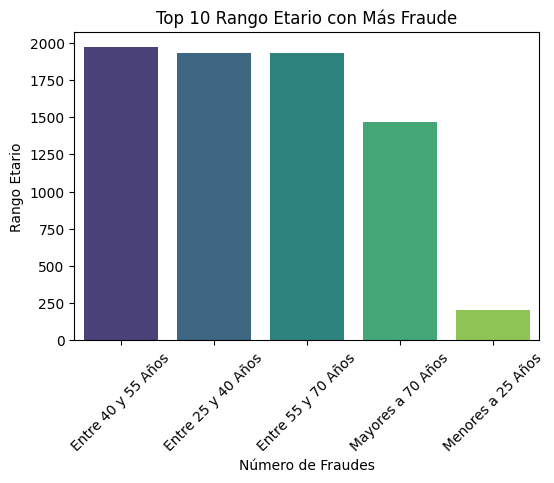

Los rangos etarios con mayor numero de Fraudes:
            age_range  count
0  Entre 40 y 55 Años   1971
1  Entre 25 y 40 Años   1933
2  Entre 55 y 70 Años   1929
3   Mayores a 70 Años   1467
4   Menores a 25 Años    206


In [121]:
# Contar el número de fraudes por estado
fraude_por_rango_etario = df_fraude['age_range'].value_counts().reset_index()
fraude_por_rango_etario.columns = ['age_range', 'count']

# Graficar los 10 estados con más fraudes
plt.figure(figsize=(6, 4))
# Crear gráfico de barras por estado (fraude)
sns.barplot(x='age_range', y='count', data=fraude_por_rango_etario.head(10), palette='viridis', hue='age_range', dodge=False)
plt.title('Top 10 Rango Etario con Más Fraude')
plt.xlabel('Número de Fraudes')
plt.xticks(rotation=45)
plt.ylabel('Rango Etario')
plt.show()

print(f'Los rangos etarios con mayor numero de Fraudes:\n{fraude_por_rango_etario.head(10)}')

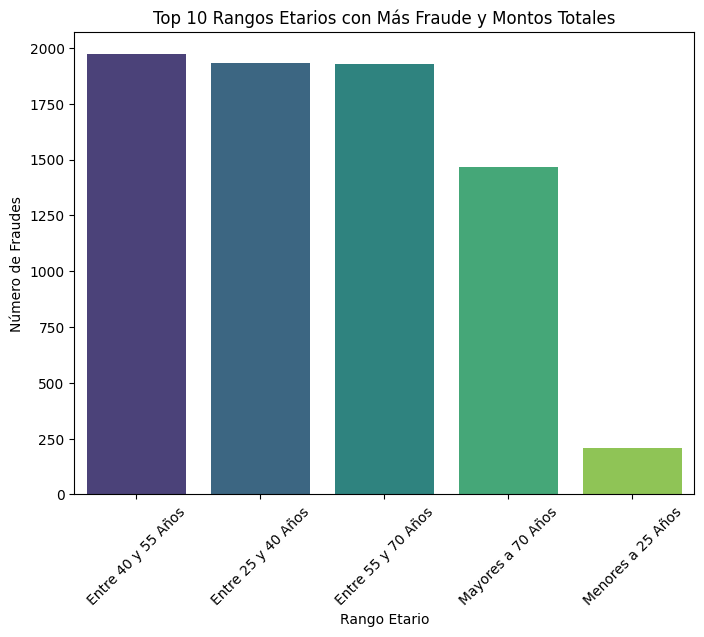

Los 10 Rangos Etarios con mayor número de Fraudes y sus montos:
            age_range  count          amt
0  Entre 40 y 55 Años   1971   939,666.93
1  Entre 25 y 40 Años   1933 1,001,408.01
2  Entre 55 y 70 Años   1929 1,080,085.36
3   Mayores a 70 Años   1467   840,544.22
4   Menores a 25 Años    206   126,384.09


In [108]:
# Contar el número de fraudes por rango etario (age_range)
fraude_por_rango_etario = df_fraude['age_range'].value_counts().reset_index()
fraude_por_rango_etario.columns = ['age_range', 'count']

# Calcular los montos totales de fraudes por rango etario
fraude_por_rango_etario_monto = df_fraude.groupby('age_range')['amt'].sum().reset_index()

# Combinar las dos informaciones en un solo DataFrame
fraude_rango_etario_info = pd.merge(fraude_por_rango_etario, fraude_por_rango_etario_monto, on='age_range')

# Graficar los 10 rangos etarios con más fraudes (con montos)
plt.figure(figsize=(8, 6))

# Crear gráfico de barras para los rangos etarios con más fraudes, usando los montos totales de fraude
sns.barplot(x='age_range', y='count', data=fraude_rango_etario_info.head(10), palette='viridis', hue='age_range', dodge=False)

# Personalizar la gráfica
plt.title('Top 10 Rangos Etarios con Más Fraude y Montos Totales')
plt.xlabel('Rango Etario')
plt.ylabel('Número de Fraudes')
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

# Imprimir los 10 rangos etarios con mayor número de fraudes y sus montos totales
print(f'Los 10 Rangos Etarios con mayor número de Fraudes y sus montos:\n{fraude_rango_etario_info.head(10)}')


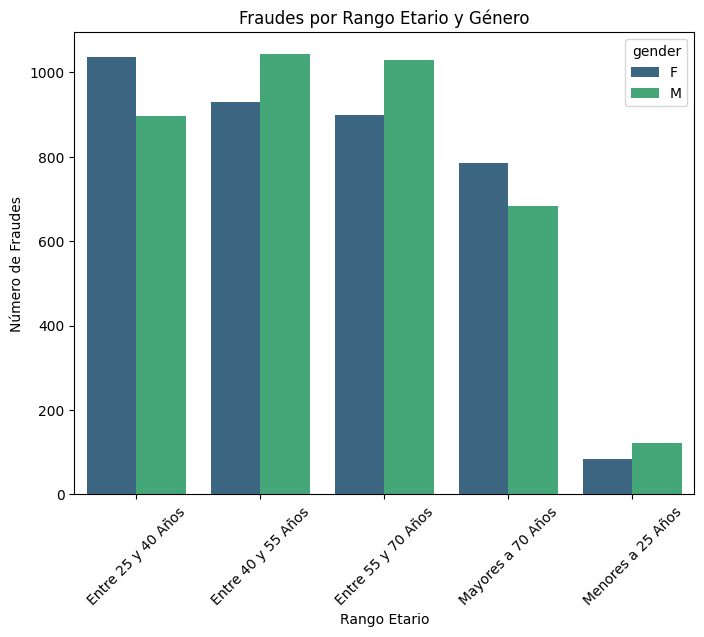

Total Fraudes por Género "F" por Rango Etario: 3735
Total Fraudes por Género "M" por Rango Etario: 3771
Fraudes por Rango Etario y Género:
            age_range gender  count
0  Entre 25 y 40 Años      F   1037
1  Entre 25 y 40 Años      M    896
2  Entre 40 y 55 Años      F    929
3  Entre 40 y 55 Años      M   1042
4  Entre 55 y 70 Años      F    899
5  Entre 55 y 70 Años      M   1030
6   Mayores a 70 Años      F    785
7   Mayores a 70 Años      M    682
8   Menores a 25 Años      F     85
9   Menores a 25 Años      M    121


In [120]:
# Contar fraudes por rango etario y género
fraude_por_rango_etario_genero = df_fraude.groupby(['age_range', 'gender']).size().reset_index(name='count')

# Graficar las columnas separadas por género y rango etario
plt.figure(figsize=(8, 6))

# Crear gráfico de barras por rango etario y separado por género
sns.barplot(x='age_range', y='count', hue='gender', data=fraude_por_rango_etario_genero, palette='viridis')

# Personalizar la gráfica
plt.title('Fraudes por Rango Etario y Género')
plt.xlabel('Rango Etario')
plt.ylabel('Número de Fraudes')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mayor legibilidad

# Mostrar la gráfica
plt.show()

# Imprimir los resultados de fraudes por rango etario y género
total_fraudes_f = fraude_por_rango_etario_genero[fraude_por_rango_etario_genero['gender'] == 'F']['count'].sum()
total_fraudes_m = fraude_por_rango_etario_genero[fraude_por_rango_etario_genero['gender'] == 'M']['count'].sum()

print(f'Total Fraudes por Género "F" por Rango Etario: {total_fraudes_f}')
print(f'Total Fraudes por Género "M" por Rango Etario: {total_fraudes_m}')
print(f'Fraudes por Rango Etario y Género:\n{fraude_por_rango_etario_genero.head(10)}')


### **Distribución General de Fraudes por Rango Etario**

**Observaciones:**
- Los tres rangos etarios con mayor incidencia de fraudes son las personas **entre 40 y 55 años**, seguidas por aquellas **entre 25 y 40 años** y **entre 55 y 70 años**.
- Las personas **mayores de 70 años** también representan un grupo significativo en términos de fraudes, aunque en menor medida.
- El rango etario **menores de 25 años** presenta una cantidad considerablemente baja de fraudes en comparación con los otros grupos.

- **Rango Etario 40-55 años**: Este grupo es el más afectado en general, y los hombres en este rango representan el mayor número de fraudes (1,042), seguido de cerca por las mujeres (929).
   
- **Rango Etario 25-40 años**: Las mujeres en este grupo presentan un número ligeramente mayor de fraudes (1,037) en comparación con los hombres (896). Este rango etario es el segundo más afectado.

- **Rango Etario 55-70 años**: Similar al grupo anterior, los hombres (1,030) sufren más fraudes que las mujeres (899).

- **Mayores de 70 años**: Curiosamente, en este grupo etario las mujeres son más propensas a ser víctimas de fraudes (785) en comparación con los hombres (682).

- **Menores de 25 años**: Este grupo muestra el menor número de fraudes, aunque los hombres (121) son más afectados que las mujeres (85).

**Conclusiones:**
- Los fraudes tienden a concentrarse en las personas de mediana edad, especialmente en los rangos de **40-55 años** y **25-40 años**. 
- En la mayoría de los rangos etarios, los hombres son ligeramente más propensos a ser víctimas de fraudes, excepto en los grupos de **25-40 años** y **mayores de 70 años**, donde las mujeres superan en número a los hombres.
- Las personas **menores de 25 años** son las menos afectadas, lo cual puede estar relacionado con factores como menor actividad financiera o menor exposición a situaciones de riesgo.
- El análisis sugiere que las estrategias de prevención de fraudes deberían enfocarse en los grupos etarios de **40 a 70 años**, dado que son los más vulnerables.



---

### **Merchant(Comercios):**

In [137]:
# Contar transacciones por comercio
transacciones_por_comercio = df['merchant'].value_counts().reset_index()

# Renombrar las columnas
transacciones_por_comercio.columns = ['merchant', 'num_transacciones']

# Visualizar los primeros resultados
print(transacciones_por_comercio.head(10))


                           merchant  num_transacciones
0                 fraud_Kilback LLC               4403
1                 fraud_Cormier LLC               3649
2                  fraud_Schumm PLC               3634
3                    fraud_Kuhn LLC               3510
4                   fraud_Boyer PLC               3493
5               fraud_Dickinson Ltd               3434
6             fraud_Cummerata-Jones               2736
7                   fraud_Kutch LLC               2734
8      fraud_Olson, Becker and Koch               2723
9  fraud_Stroman, Hudson and Erdman               2721


In [138]:
# Filtrar fraudes
fraudes_por_comercio = df[df['is_fraud'] == 1]['merchant'].value_counts().reset_index()

# Renombrar las columnas
fraudes_por_comercio.columns = ['merchant', 'num_fraudes']

# Visualizar los primeros resultados
print(fraudes_por_comercio.head(10))

                merchant  num_fraudes
0     fraud_Rau and Sons           49
1      fraud_Cormier LLC           48
2      fraud_Kozey-Boehm           48
3        fraud_Doyle Ltd           47
4  fraud_Vandervort-Funk           47
5      fraud_Kilback LLC           47
6    fraud_Padberg-Welch           44
7         fraud_Kuhn LLC           44
8       fraud_Terry-Huel           43
9    fraud_Koepp-Witting           42


In [140]:
# Unir transacciones y fraudes por comercio
comparacion_fraudes = pd.merge(
    transacciones_por_comercio, 
    fraudes_por_comercio, 
    on='merchant', 
    how='left'
).fillna(0) 

# Calcular el porcentaje de fraudes
comparacion_fraudes['porcentaje_fraude'] = (comparacion_fraudes['num_fraudes'] / comparacion_fraudes['num_transacciones']) * 100

# Visualizar los resultados
print(comparacion_fraudes.sort_values(by='porcentaje_fraude', ascending=False).head(10))


                                 merchant  num_transacciones  num_fraudes  \
342                     fraud_Kozey-Boehm               1866        48.00   
556     fraud_Herman, Treutel and Dickens               1300        33.00   
371                 fraud_Kerluke-Abshire               1838        41.00   
593                       fraud_Brown PLC               1176        26.00   
288                     fraud_Goyette Inc               1943        42.00   
262                      fraud_Terry-Huel               1996        43.00   
280                        fraud_Jast Ltd               1953        42.00   
276   fraud_Schmeler, Bashirian and Price               1968        41.00   
304                  fraud_Boyer-Reichert               1908        38.00   
275  fraud_Langworth, Boehm and Gulgowski               1969        39.00   

     porcentaje_fraude  
342               2.57  
556               2.54  
371               2.23  
593               2.21  
288               2.16  
26

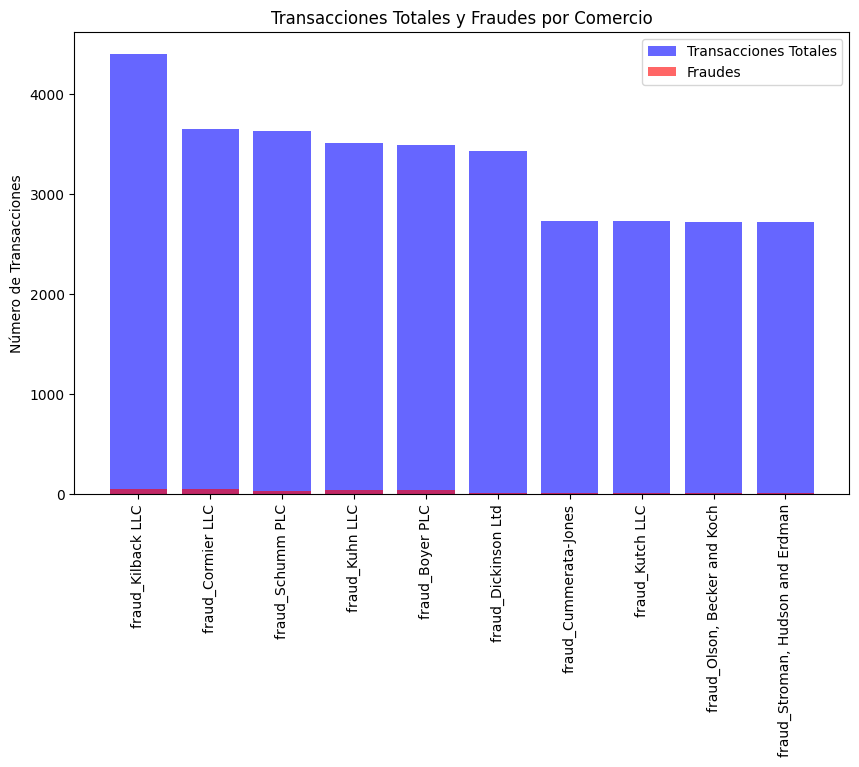

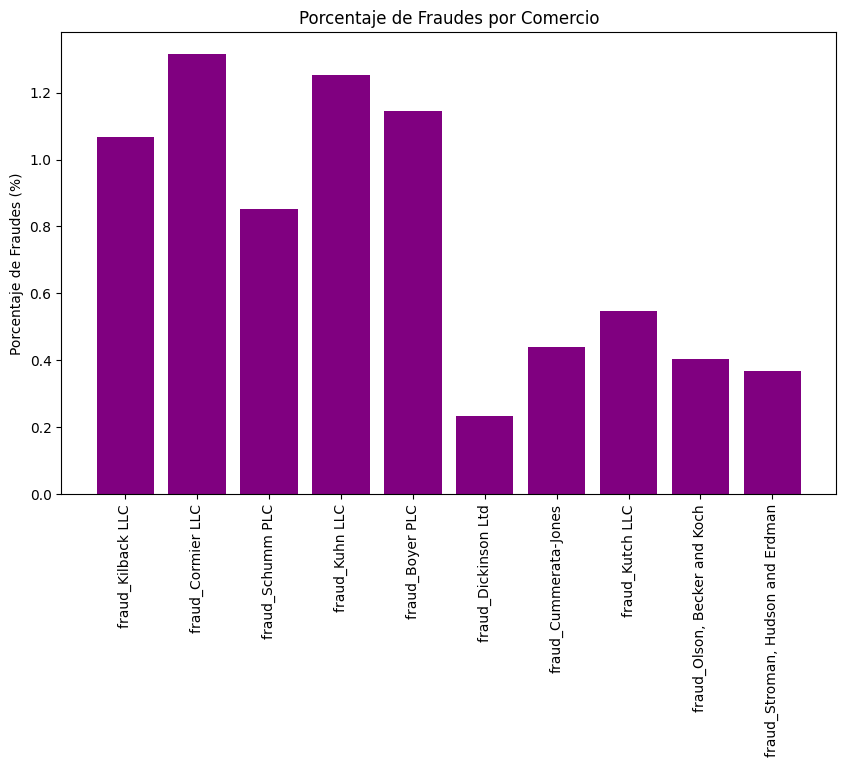

In [141]:
# Seleccionar los comercios con más fraudes
top_comercios = comparacion_fraudes.head(10)

# Gráfico de fraudes por comercio
plt.figure(figsize=(10, 6))
plt.bar(top_comercios['merchant'], top_comercios['num_transacciones'], label='Transacciones Totales', color='blue', alpha=0.6)
plt.bar(top_comercios['merchant'], top_comercios['num_fraudes'], label='Fraudes', color='red', alpha=0.6)
plt.xticks(rotation=90)
plt.ylabel('Número de Transacciones')
plt.title('Transacciones Totales y Fraudes por Comercio')
plt.legend()
plt.show()

# Gráfico de porcentaje de fraudes por comercio
plt.figure(figsize=(10, 6))
plt.bar(top_comercios['merchant'], top_comercios['porcentaje_fraude'], color='purple')
plt.xticks(rotation=90)
plt.ylabel('Porcentaje de Fraudes (%)')
plt.title('Porcentaje de Fraudes por Comercio')
plt.show()



### **Observaciones:**

- **fraud_Kozey-Boehm** tiene el porcentaje de fraude más alto (2.57%) entre sus transacciones totales. Aunque el número de transacciones (1866) no es el más alto, la proporción de fraudes es la mayor.
- **fraud_Herman, Treutel and Dickens** tiene un porcentaje de fraude del 2.54%, muy cercano al de Kozey-Boehm, pero con un menor número de transacciones totales (1300).
- Los comercios con altos volúmenes de transacciones como **fraud_Terry-Huel** (1996) y **fraud_Jast Ltd** (1953) también presentan un porcentaje de fraudes notable (2.15%).

Estos comercios destacan como puntos clave de interés ya que combinan un número significativo de operaciones con un porcentaje considerable de fraude.



### **Conclusión**
El análisis muestra que:
- No necesariamente los comercios con mayor cantidad de transacciones son los más propensos a fraudes, ya que algunos con muchas operaciones tienen un porcentaje bajo de fraude.
- Los comercios con un alto porcentaje de fraude, aunque no lideran en número total de transacciones, pueden representar un riesgo elevado debido a la mayor proporción de fraudes en comparación con las operaciones legítimas.



In [144]:
# Monto total de ventas por comercio
ventas_por_comercio = df.groupby('merchant')['amt'].sum().reset_index()

# Renombrar las columnas
ventas_por_comercio.columns = ['merchant', 'monto_total']

# Visualizar los comercios con más ventas
print(ventas_por_comercio.sort_values(by='monto_total', ascending=False).head(10))


                             merchant  monto_total
316                 fraud_Kilback LLC   391,078.15
73                  fraud_Bradtke PLC   302,481.25
146                   fraud_Doyle Ltd   300,971.37
217           fraud_Hackett-Lueilwitz   300,208.14
572  fraud_Schumm, Bauch and Ondricka   299,115.14
494                fraud_Rau and Sons   298,354.77
196            fraud_Goodwin-Nitzsche   298,083.31
468            fraud_Pacocha-O'Reilly   297,584.38
447              fraud_Murray-Smitham   296,982.73
29                 fraud_Bauch-Raynor   295,721.20


In [145]:
# Monto total de fraudes por comercio
fraudes_monto_por_comercio = df[df['is_fraud'] == 1].groupby('merchant')['amt'].sum().reset_index()

# Renombrar las columnas
fraudes_monto_por_comercio.columns = ['merchant', 'monto_fraude']

# Visualizar los comercios con más monto de fraudes
print(fraudes_monto_por_comercio.sort_values(by='monto_fraude', ascending=False).head(10))


                                merchant  monto_fraude
334                    fraud_Kozey-Boehm     48,189.98
105                    fraud_Cormier LLC     44,903.89
279                       fraud_Jast Ltd     42,560.34
603                     fraud_Terry-Huel     42,356.37
199                    fraud_Goyette Inc     41,580.84
301                fraud_Kerluke-Abshire     40,909.57
544  fraud_Schmeler, Bashirian and Price     40,143.05
192             fraud_Gleason-Macejkovic     39,892.84
344        fraud_Kuhic, Bins and Pfeffer     39,865.69
343                      fraud_Kuhic LLC     39,765.06


In [146]:
# Unir los datos de ventas y fraudes
comparacion_monto = pd.merge(
    ventas_por_comercio, 
    fraudes_monto_por_comercio, 
    on='merchant', 
    how='left'
).fillna(0)  # Rellenar con 0 donde no hubo fraudes

# Calcular el porcentaje de fraude en el monto total
comparacion_monto['porcentaje_fraude_monto'] = (comparacion_monto['monto_fraude'] / comparacion_monto['monto_total']) * 100

# Visualizar los comercios con más fraudes en términos de porcentaje de monto
print(comparacion_monto.sort_values(by='porcentaje_fraude_monto', ascending=False).head(10))


                                merchant  monto_total  monto_fraude  \
337                    fraud_Kozey-Boehm   183,312.29     48,189.98   
238  fraud_Heathcote, Yost and Kertzmann   141,804.10     34,263.17   
282                       fraud_Jast Ltd   176,525.38     42,560.34   
245    fraud_Herman, Treutel and Dickens   113,180.43     26,069.11   
31      fraud_Baumbach, Feeney and Morar   162,147.50     37,293.87   
193             fraud_Gleason-Macejkovic   175,028.52     39,892.84   
200                    fraud_Goyette Inc   182,472.25     41,580.84   
616                     fraud_Terry-Huel   186,191.02     42,356.37   
304                fraud_Kerluke-Abshire   180,189.07     40,909.57   
346                      fraud_Kuhic LLC   176,392.47     39,765.06   

     porcentaje_fraude_monto  
337                    26.29  
238                    24.16  
282                    24.11  
245                    23.03  
31                     23.00  
193                    22.79  
2

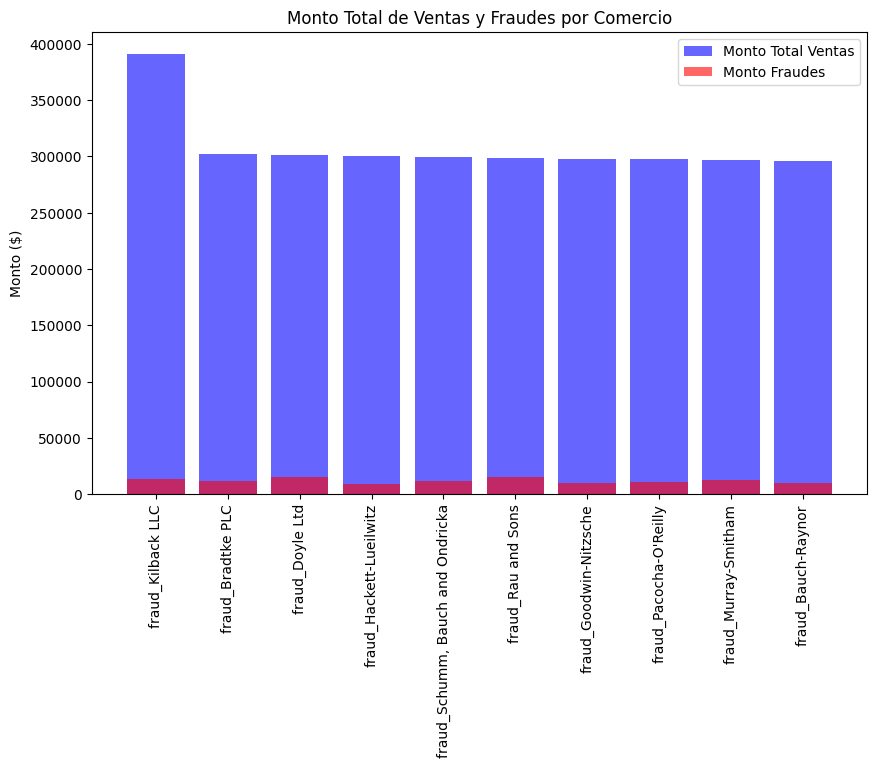

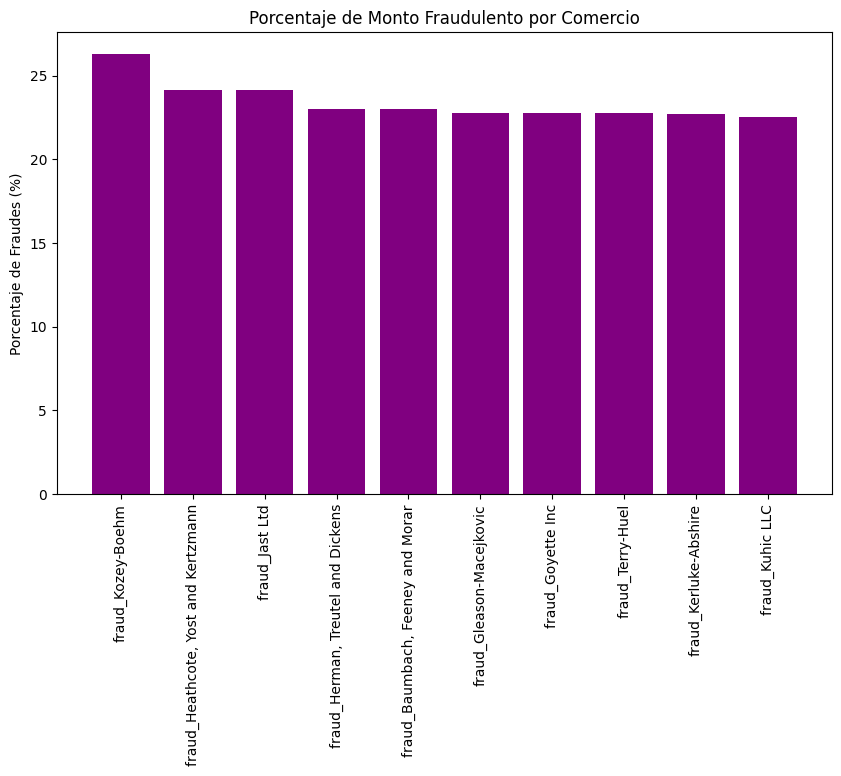

In [147]:
# Seleccionar los comercios con más ventas
top_comercios_ventas = comparacion_monto.sort_values(by='monto_total', ascending=False).head(10)

# Gráfico de ventas totales y fraudes en monto por comercio
plt.figure(figsize=(10, 6))
plt.bar(top_comercios_ventas['merchant'], top_comercios_ventas['monto_total'], label='Monto Total Ventas', color='blue', alpha=0.6)
plt.bar(top_comercios_ventas['merchant'], top_comercios_ventas['monto_fraude'], label='Monto Fraudes', color='red', alpha=0.6)
plt.xticks(rotation=90)
plt.ylabel('Monto ($)')
plt.title('Monto Total de Ventas y Fraudes por Comercio')
plt.legend()
plt.show()

# Gráfico de porcentaje de fraudes en monto por comercio
top_comercios_fraude_monto = comparacion_monto.sort_values(by='porcentaje_fraude_monto', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_comercios_fraude_monto['merchant'], top_comercios_fraude_monto['porcentaje_fraude_monto'], color='purple')
plt.xticks(rotation=90)
plt.ylabel('Porcentaje de Fraudes (%)')
plt.title('Porcentaje de Monto Fraudulento por Comercio')
plt.show()


#### **Observaciones:**

**Comercios con Mayor Proporción de Fraudes por Monto**
- **fraud_Kozey-Boehm** tiene el porcentaje más alto de fraude en relación con el monto total, con un **26.29%** de los $183,312.29 en transacciones siendo fraudulentas.
- **fraud_Heathcote, Yost and Kertzmann** y **fraud_Jast Ltd** tienen porcentajes cercanos de fraude, con **24.16%** y **24.11%** respectivamente, lo que indica que aproximadamente una cuarta parte de sus operaciones totales en términos de valor son fraudulentas.

**Comercios con Alto Monto Total y Monto de Fraude**
- **fraud_Terry-Huel** y **fraud_Goyette Inc** tienen montos totales de transacciones superiores a los $180,000, pero también presentan un alto porcentaje de fraude, cercano al **22.75%**, lo que representa un riesgo considerable.
- **fraud_Kerluke-Abshire** y **fraud_Kuhic LLC** también presentan montos elevados, con porcentajes de fraude alrededor del **22.54%** al **22.70%**, lo que sigue siendo significativamente alto en términos absolutos.


#### **Conclusión**

El análisis muestra que:
- **fraud_Kozey-Boehm** se destaca como el comercio con mayor proporción de fraude en términos de monto, lo que indica una necesidad de especial atención en este tipo de transacciones.
- Comercios como **fraud_Heathcote, Yost and Kertzmann** y **fraud_Jast Ltd**, a pesar de no tener el monto total más alto, presentan un porcentaje de fraude alarmante (más del 24%).
- El porcentaje de fraude en estos comercios, aunque varía ligeramente, sigue siendo considerable en la mayoría, con fraudes que representan entre el **22.54%** y el **26.29%** del total de sus transacciones monetarias.
